In [1]:
import glob
import numpy as np
from PIL import Image
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
ground=glob.glob("D:/ISIC2018_Task1_Training_GroundTruth_x2/*.png")
train=glob.glob("D:/ISIC2018_Task1-2_Training_Input_x2/*.jpg")

In [3]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import keras

Using TensorFlow backend.


In [4]:
print('Size of training set:', len(train))

Size of training set: 2594


In [5]:
print('Size of ground set:', len(ground))

Size of ground set: 2594


In [6]:
ground_images = []

for dire in range(len(ground)):
    img =np.array((Image.open(ground[dire]).resize((256, 256))))
    ground_images.append(img)

In [7]:
train_images = []

for dire in range(len(train)):
    img = np.array((Image.open(train[dire]).resize((256, 256))))
    train_images.append(img)

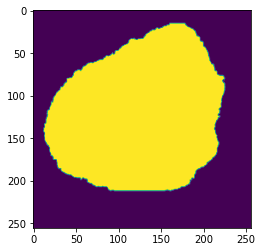

In [8]:
plt.imshow(ground_images[0])

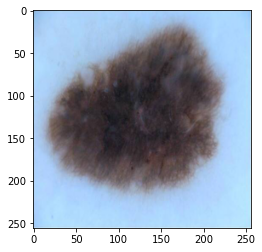

In [9]:
plt.imshow(train_images[0])

for dir1 in range(len(ground_images)):
    new1=ground_images[dir1]
    for i in range(len(new1)):
        for j in range(len(new1[i])):
            if(new1[i][j]>0 and new1[i][j]<255):
                new1[i][j]=127
    ground_images[dir1]=new1
    ground_images[ground_images > 127] = 1
    ground_images[ground_images < 127] = 0
           

In [10]:
for x in ground_images:
    x[x <= 127] = 0
    x[x > 127] = 1

In [11]:
for x in range(len(train_images)):
    list1=train_images[x]
    list1=list1/255
    train_images[x]=list1

In [12]:
train_images=np.array(train_images)
train_images.shape

(2594, 256, 256, 3)

In [15]:
ground_img=np.expand_dims(np.array(ground_images),-1)
print(ground_img.shape)

(2594, 256, 256, 1)


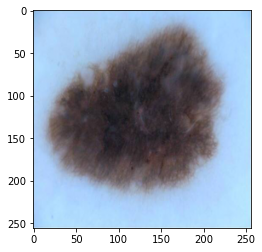

In [16]:
plt.imshow(train_images[0])

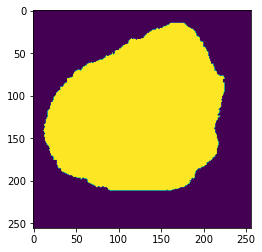

In [17]:
plt.imshow(ground_images[0])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_images, ground_img, test_size=0.33, random_state=42)

In [19]:
inputs_layer = Input(shape=(256,256,3))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs_layer)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv10 =Conv2D(1,1, activation = 'sigmoid')(conv9)

model = Model(inputs =inputs_layer, outputs = conv10)

model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [20]:
history = model.fit(X_train,y_train, epochs=100,batch_size=10, verbose=1)


Epoch 1/100
1737/1737 [==============================] - 78s 45ms/step - loss: 0.3649 - accuracy: 0.8448
Epoch 2/100
1737/1737 [==============================] - 68s 39ms/step - loss: 0.3028 - accuracy: 0.9040
Epoch 3/100
1737/1737 [==============================] - 68s 39ms/step - loss: 0.2825 - accuracy: 0.9138
Epoch 4/100
1737/1737 [==============================] - 68s 39ms/step - loss: 0.2636 - accuracy: 0.9244
Epoch 5/100
1737/1737 [==============================] - 68s 39ms/step - loss: 0.2570 - accuracy: 0.9263
Epoch 6/100
1737/1737 [==============================] - 68s 39ms/step - loss: 0.2515 - accuracy: 0.9305
Epoch 7/100
1737/1737 [==============================] - 68s 39ms/step - loss: 0.2515 - accuracy: 0.9300
Epoch 8/100
1737/1737 [==============================] - 68s 39ms/step - loss: 0.2438 - accuracy: 0.9326
Epoch 9/100
1737/1737 [==============================] - 68s 39ms/step - loss: 0.2379 - accuracy: 0.9360
Epoch 10/100
1737/1737 [==============================]

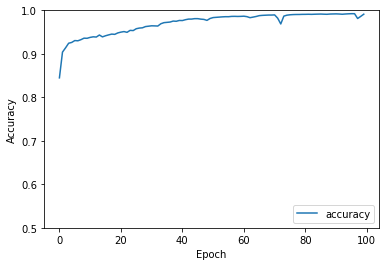

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [22]:
ypred = model.predict(X_test)

In [42]:
def dice_coef2(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    union = np.sum(y_true_f) + np.sum(y_pred_f)
    if union==0: return 1
    intersection = np.sum(y_true_f * y_pred_f)
    return 2. * intersection / union

In [43]:
dice_coef2(y_test,ypred)

0.8325091462746881